# Airline Passenger Satissfaction Project

### Read, Clean, Visualize, and Feature Manipulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.shape

(103904, 25)

In [4]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Data Cleaning

In [6]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [8]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [9]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
df.drop(columns = 'Unnamed: 0', inplace = True)

df.drop(columns = 'id', inplace = True)

### Changing dtypes to numerical outputs

In [11]:
df['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [12]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_36676\3569744254.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


In [13]:
df['Gender'] = df['Gender'].astype(int)

In [14]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [15]:
df['Customer Type'] = df['Customer Type'].replace({'Loyal Customer': 0, 'disloyal Customer': 1})

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_36676\2921755825.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Type'] = df['Customer Type'].replace({'Loyal Customer': 0, 'disloyal Customer': 1})


In [16]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [17]:
df['Type of Travel'] = df['Type of Travel'].replace({'Business travel': 0, 'Personal Travel': 1})

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_36676\490104078.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type of Travel'] = df['Type of Travel'].replace({'Business travel': 0, 'Personal Travel': 1})


In [18]:
df['Type of Travel'].value_counts()

Type of Travel
0    71655
1    32249
Name: count, dtype: int64

In [19]:
df['Type of Travel'] = df['Type of Travel'].replace({'Business travel': 0, 'Personal Travel': 1})

In [20]:
df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [21]:
df['Class'] = df['Class'].replace({'Business': 0, 'Eco': 1, 'Eco Plus': 2})

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_36676\3204295171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace({'Business': 0, 'Eco': 1, 'Eco Plus': 2})


In [22]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [23]:
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_36676\3369974358.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})


In [24]:
df.to_csv('cleaned_airline_passenger_satisfaction.csv', index=False)

### EDA

In [25]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


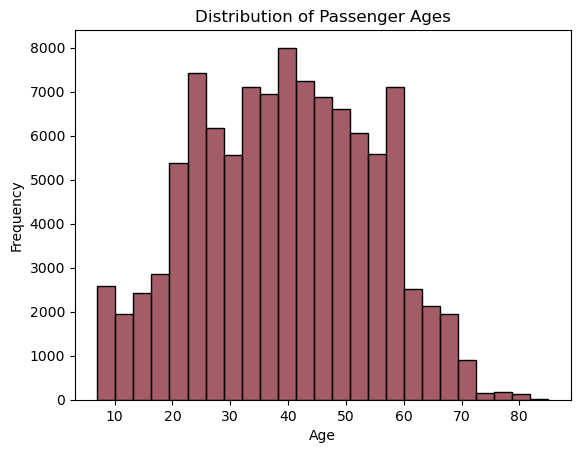

In [26]:
sns.histplot(data = df,
             x = 'Age',
             bins = 25,
             color = '#862633') #Delta airlines red

plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_36676\2844586028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,


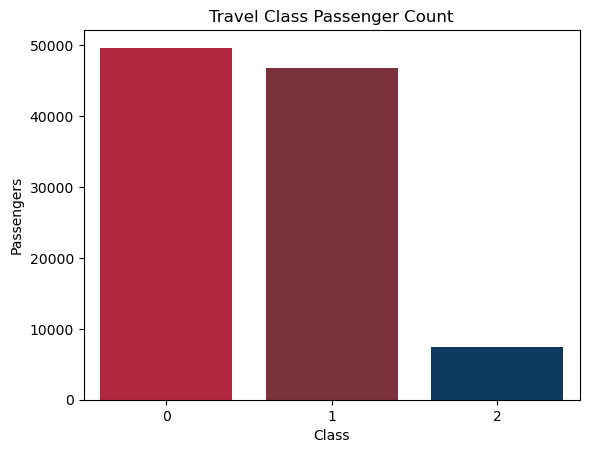

In [27]:
sns.countplot(data = df,
              x = 'Class',
              palette = ['#c8102e', '#862633', '#003a70'])

plt.title('Travel Class Passenger Count')
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.show()

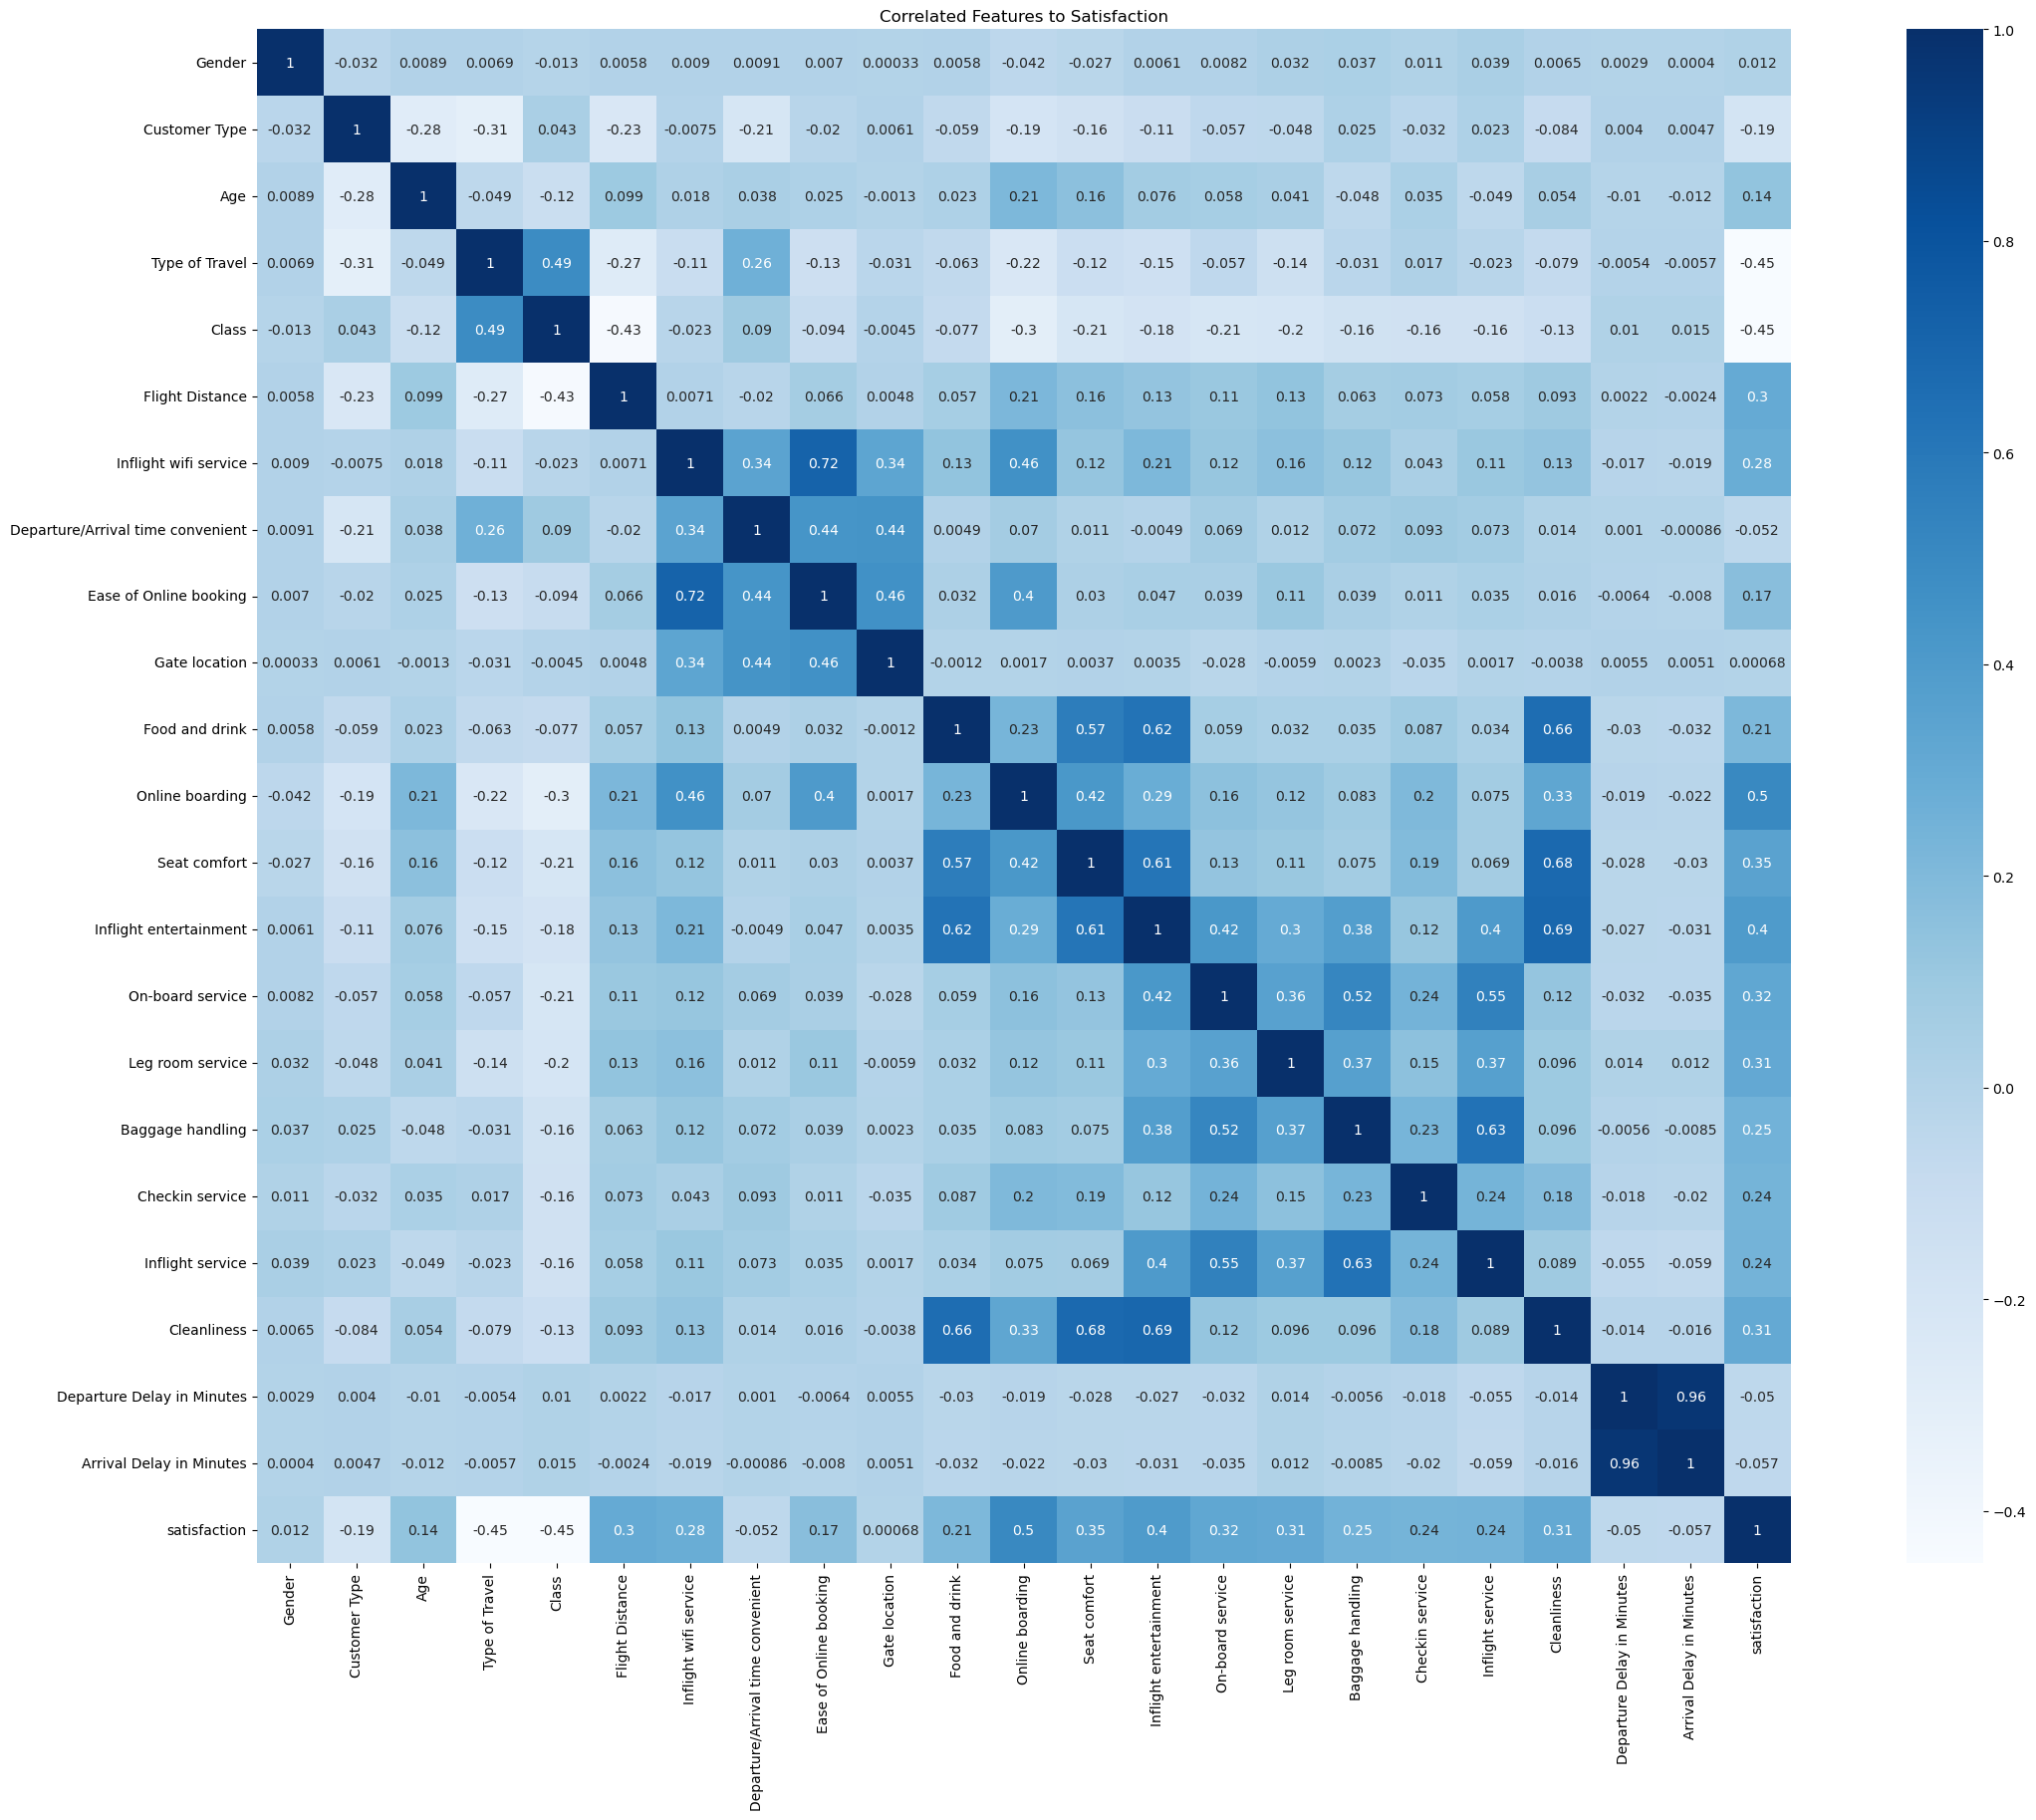

In [28]:
numbers = df.select_dtypes(include = np.number)
plt.figure(figsize = (30, 20))
sns.heatmap(numbers.corr(),
            annot = True,
            cmap = 'Blues',
            square = True)

plt.title('Correlated Features to Satisfaction')
plt.show()

### Feature Engineering

In [29]:
df['Experienced delay'] = ((df['Departure Delay in Minutes'] > 0) | 
                            (df['Arrival Delay in Minutes'] > 0)).astype(int)

In [30]:
service_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness'
]

df['Total Service Score'] = df[service_cols].mean(axis=1)

In [31]:
bins = [0, 18, 30, 50, 65, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Mature', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins = bins, labels = labels)

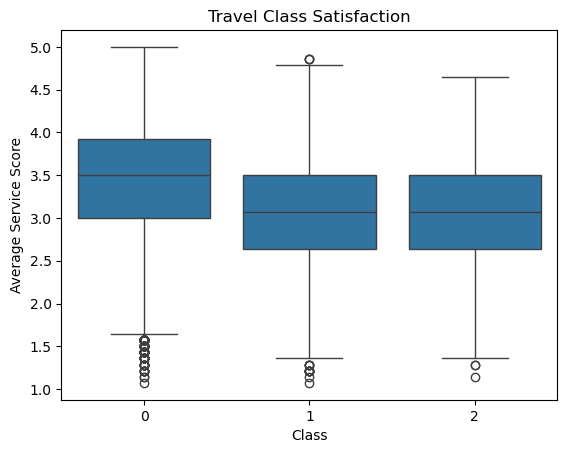

In [32]:
sns.boxplot(data=df,
            x='Class',
            y='Total Service Score')

plt.title('Travel Class Satisfaction')
plt.xlabel('Class')
plt.ylabel('Average Service Score')
plt.show()

In [33]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Experienced delay                    0
Total Service Score                  0
Age Group                